<a href="https://colab.research.google.com/github/mahesh-ml/MLBasics/blob/main/MinMaxScaling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Min max scaler squeezes values between 0-1 
#formula X-X.min/X.max-X.min
#here mean is not centered at zero , shape is same as original , its sensitive to outliers
# will not normalize distribution

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,RobustScaler

In [3]:
#load dataset
boston_dataset = load_boston()

data = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)

data['MEDV'] = boston_dataset.target
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
#split train test
X_train, X_test, y_train, y_test = train_test_split(data.drop('MEDV',axis=1),
                                                    data['MEDV'], test_size=0.3, random_state=0)

In [5]:
#MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(X_train)

X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [6]:
scaler.data_max_

array([ 88.9762, 100.    ,  27.74  ,   1.    ,   0.871 ,   8.78  ,
       100.    ,  12.1265,  24.    , 711.    ,  22.    , 396.9   ,
        36.98  ])

In [9]:
scaler.min_

array([-7.10352762e-05,  0.00000000e+00, -1.68621701e-02,  0.00000000e+00,
       -7.92181070e-01, -6.82314620e-01, -2.98661174e-02, -1.07210358e-01,
       -4.34782609e-02, -3.56870229e-01, -1.34042553e+00, -8.06898986e-04,
       -4.90780142e-02])

In [8]:
scaler.data_range_

array([8.896988e+01, 1.000000e+02, 2.728000e+01, 1.000000e+00,
       4.860000e-01, 5.219000e+00, 9.710000e+01, 1.095230e+01,
       2.300000e+01, 5.240000e+02, 9.400000e+00, 3.965800e+02,
       3.525000e+01])

In [10]:
#convert numpy array to dataframe
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)


In [11]:
#describe scaled data
np.round(X_train_scaled.describe(),1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0
mean,0.0,0.1,0.4,0.1,0.4,0.5,0.7,0.2,0.4,0.4,0.6,0.9,0.3
std,0.1,0.2,0.3,0.2,0.2,0.1,0.3,0.2,0.4,0.3,0.2,0.2,0.2
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.2,0.0,0.1,0.4,0.4,0.1,0.1,0.2,0.5,0.9,0.1
50%,0.0,0.0,0.3,0.0,0.3,0.5,0.8,0.2,0.2,0.2,0.7,1.0,0.3
75%,0.0,0.2,0.6,0.0,0.5,0.6,0.9,0.4,1.0,0.9,0.8,1.0,0.4
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


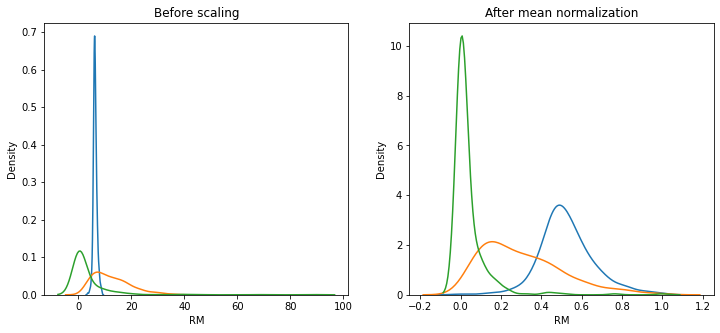

In [12]:
#plot
fig , (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,5))

#before scale
ax1.set_title('Before scaling')
sb.kdeplot(X_train['RM'], ax= ax1)
sb.kdeplot(X_train['LSTAT'], ax= ax1)
sb.kdeplot(X_train['CRIM'], ax= ax1)

#before scale
ax2.set_title('After mean normalization')
sb.kdeplot(X_train_scaled['RM'], ax= ax2)
sb.kdeplot(X_train_scaled['LSTAT'], ax= ax2)
sb.kdeplot(X_train_scaled['CRIM'], ax= ax2)

plt.show()